In [1]:
# Linux - install python3-pyaudio 
import sounddevice as sd
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from math import ceil
import librosa

1. SYGNAŁ AUDIO

Zadanie 1

Zadanie 2

In [2]:
s, fs = sf.read('glos.wav', dtype='float32')

# sd.play(s, fs)
# sd.wait()

Zadanie 3

Text(0.5, 0, 'Czas [ms]')

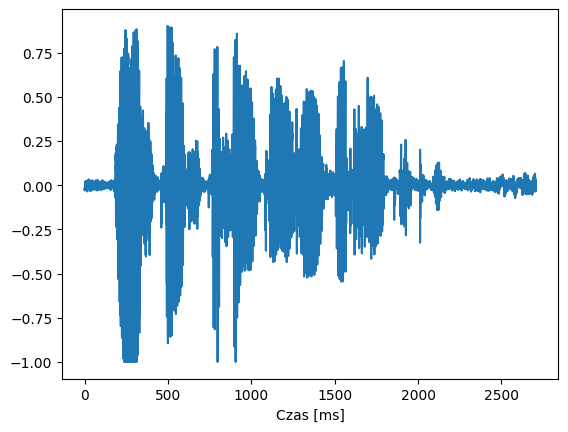

In [3]:
s /= np.max(np.abs(s)) # jeśli nie jest znormalizowany

czas_ms = len(s) / fs * 1000

x = np.linspace(0, czas_ms, len(s))

plt.plot(x, s);
plt.xlabel('Czas [ms]')
# plt.xticks(np.linspace(0, czas_ms, 15), rotation=35);


Zadanie 4

Zadanie 5

2. Zastosowanie okien kroczących

In [4]:
ramka_10ms = fs * 0.01
liczba_ramek = ceil(len(s) / ramka_10ms)
liczba_ramek

271

Zadanie 1 i 2

In [5]:
def f(s=s, fs=fs, czas_trwania_sygnalu=czas_ms, czas_trwania_ramki_ms=10):
    ramka_dlugosc = fs * czas_trwania_ramki_ms / 1000
    liczba_ramek = ceil(len(s) / ramka_dlugosc)
    ramki = np.array_split(s, liczba_ramek)

    E = [np.sum(np.power(ramka, 2)) for ramka in ramki]
    E = np.array(E)

    Z = np.empty_like(E)
    for i, ramka in enumerate(ramki):
        zi = [0 if ramka[j] * ramka[j + 1] >= 0 else 1 for j in range(len(ramka) - 1)]
        Z[i] = np.sum(zi)

    Z /= np.max(np.abs(Z))
    E = np.array(E)
    E /=  np.max(np.abs(E))

    x_ramki = np.arange(0, czas_ms, czas_trwania_ramki_ms)[:E.shape[0]]

    return x_ramki, E, Z

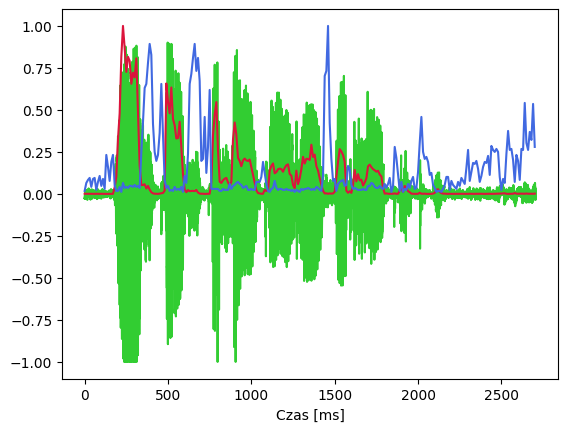

In [6]:
x_ramki, E, Z = f(czas_trwania_ramki_ms=10)
plt.plot(x, s, color='limegreen')
plt.xlabel('Czas [ms]');
plt.plot(x_ramki, E, color='crimson')
plt.plot(x_ramki, Z, color='royalblue');


Zadanie 3

funkcja E:
    minima - momenty ciszy (np. przerwy między słowami gdy słychac jedynie szum mikrofonu)
    maksima - głośniejsze fragmenty (np. wypowiadane słowa)

Funkcja Z:
    maksima - wiele zmian częstotliwości dźwięku
    minima - małe zmiany w częstotliwości dźwięku (np. cisza lub jednolity dźwięk)

Można ich użyć do podziału sygnału na segmenty dźwięcznie i bezdźwięczne:
    funkcja E - sygnał poniżej pewnych wartości można uznać za bezdźwięczny
    funkcja Z - wykrywanie aktywności głosowej

Zadanie 4

In [7]:
x_ramki_5ms, E_5ms, Z_5ms = f(czas_trwania_ramki_ms=5)
x_ramki_20ms, E_20ms, Z_20ms = f(czas_trwania_ramki_ms=20)
x_ramki_50ms, E_50ms, Z_50ms = f(czas_trwania_ramki_ms=50)

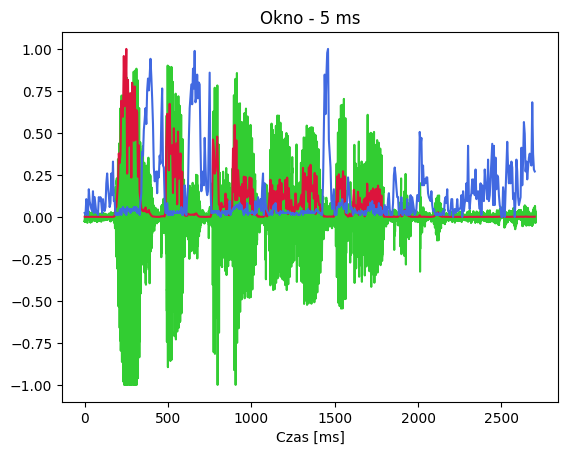

In [8]:
plt.plot(x, s, color='limegreen')
plt.xlabel('Czas [ms]');
plt.plot(x_ramki_5ms, E_5ms, color='crimson')
plt.plot(x_ramki_5ms, Z_5ms, color='royalblue')
plt.title("Okno - 5 ms");

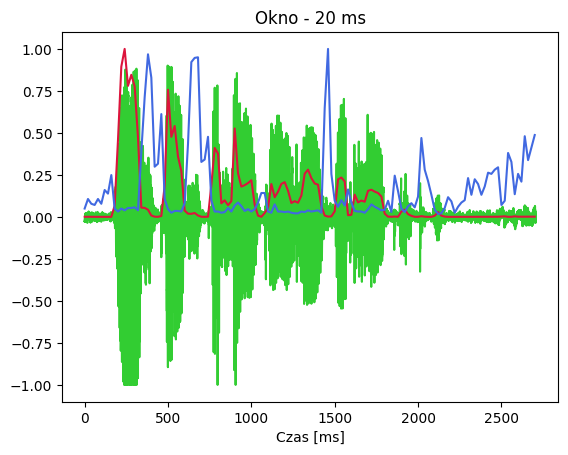

In [9]:
plt.plot(x, s, color='limegreen')
plt.xlabel('Czas [ms]');
plt.plot(x_ramki_20ms, E_20ms, color='crimson')
plt.plot(x_ramki_20ms, Z_20ms, color='royalblue')
plt.title("Okno - 20 ms");

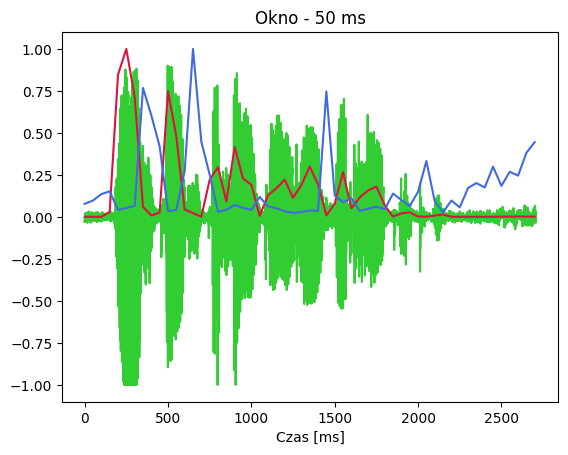

In [10]:
plt.plot(x, s, color='limegreen')
plt.xlabel('Czas [ms]');
plt.plot(x_ramki_50ms, E_50ms, color='crimson')
plt.plot(x_ramki_50ms, Z_50ms, color='royalblue')
plt.title("Okno - 50 ms");

Zadanie 5

In [11]:

dl_ramki_50ms = int(fs * 0.05)
przesuniecie = int(dl_ramki_50ms * 0.5)
ramki_przesuniete = np.lib.stride_tricks.sliding_window_view(s, window_shape=(dl_ramki_50ms,), axis=0)[0::przesuniecie]

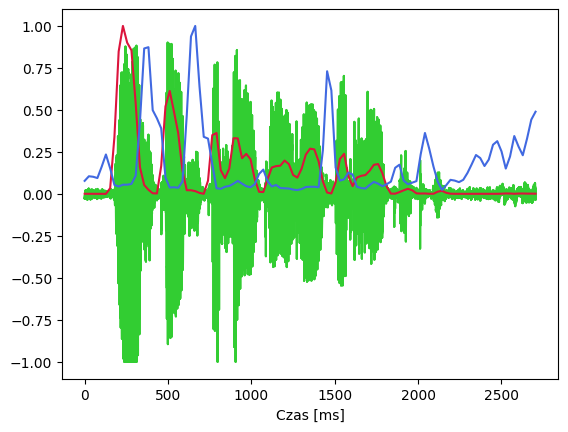

In [12]:
plt.plot(x, s, color='limegreen')
plt.xlabel('Czas [ms]');

E_przesuniete = [np.sum(np.power(ramka, 2)) for ramka in ramki_przesuniete]
E_przesuniete = np.array(E_przesuniete)

Z_przesuniete = np.empty_like(E_przesuniete)
for i, ramka in enumerate(ramki_przesuniete):
    zi = [0 if ramka[j] * ramka[j + 1] > 0 else 1 for j in range(len(ramka) - 1)]
    Z_przesuniete[i] = np.sum(zi)

Z_przesuniete /= np.max(np.abs(Z_przesuniete))
E_przesuniete = np.array(E_przesuniete)
E_przesuniete /=  np.max(np.abs(E_przesuniete))

x_ramki_przesuniete = np.arange(0, czas_ms, 10)[:E_przesuniete.shape[0]]

plt.plot(x, s, color='limegreen')
plt.xlabel('Czas [ms]');
plt.plot(np.linspace(0, x[-1], E_przesuniete.shape[0]), E_przesuniete, color='crimson')
plt.plot(np.linspace(0, x[-1], E_przesuniete.shape[0]), Z_przesuniete, color='royalblue');

3. Analiza częstotliwości

Zadanie 1

In [13]:
i = s[56448 : 56448+2048]
czas_ms = len(s) / fs * 1000
x = np.linspace(0, czas_ms, len(i))

Zadanie 2

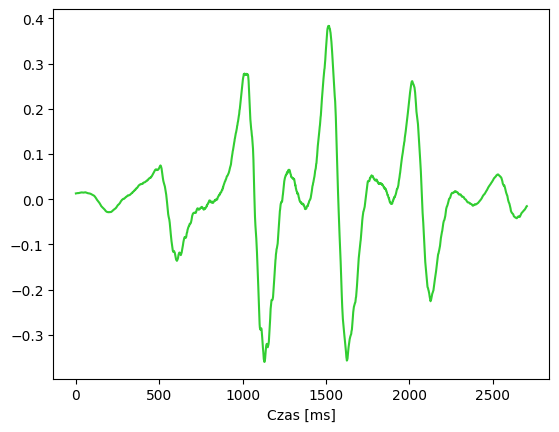

In [14]:
okno_hamminga = np.hamming(len(i))
sh = i * okno_hamminga

plt.plot(x, sh, color='limegreen')
plt.xlabel('Czas [ms]');

Zadanie 3

In [15]:
yf = fft(sh)
log_widmo_amplitudowe = np.log(np.abs(yf))

Zadanie 4

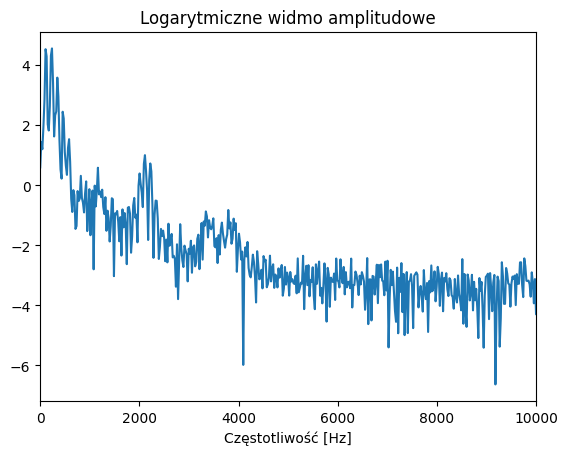

In [16]:
czestotliwosci = np.linspace(0, fs, len(log_widmo_amplitudowe))
plt.plot(czestotliwosci, log_widmo_amplitudowe)
plt.xlim(0, 10000)
plt.xlabel('Częstotliwość [Hz]')
plt.title('Logarytmiczne widmo amplitudowe');

Zadanie 5

In [17]:
F0= czestotliwosci[np.argmax(log_widmo_amplitudowe)]
F0

236.980947728383

4. Rozpoznawanie samogłosek ustnych

Zadanie 1

In [18]:
okno = i

Zadanie 2

In [19]:
p = 20
a = librosa.lpc(okno, order=p)

Zadanie 3

Liniowe kodowanie predykcyjne - technika wykorzystywana do przedwarzania sygnałów audio, służący do reprezentowania obwiedni widma sygnału w postaci skompresowanej - wykorzystując liniowy model predykcyjny

Zadanie 4

In [20]:
a = np.pad(a, (0, 2048-a.shape[0]), 'constant')


Zadanie 5

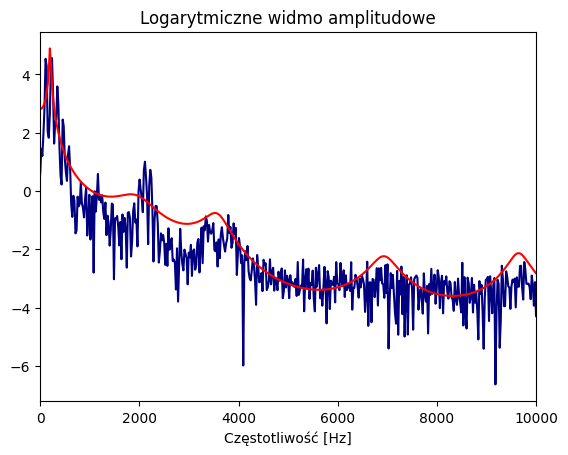

In [21]:
y = fft(a)
widmoLPC = np.log(np.abs(y)) * (-1)

czestotliwosci = np.linspace(0, fs, len(log_widmo_amplitudowe))
plt.plot(czestotliwosci, log_widmo_amplitudowe, color='navy')
plt.xlim(0, 10000)
plt.xlabel('Częstotliwość [Hz]')
plt.title('Logarytmiczne widmo amplitudowe')

plt.plot(czestotliwosci, widmoLPC-2.9, color='red');